In [1]:
import pandas as pd

In [2]:
styles = pd.read_csv("filtered_styles.csv")

In [3]:
keep_cols = ["id", "gender", "masterCategory", "subCategory", "articleType", "baseColour", "usage"]
styles = styles[keep_cols]
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,usage
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Sports
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Sports
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Sports
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Casual
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Sports


In [4]:
types = styles["articleType"].value_counts().index
type_freqs = styles["articleType"].value_counts().values
article_type_dict = dict(zip(types, type_freqs))
for k, v in article_type_dict.items():
    print(k, ":", v)

Tshirts : 7066
Shirts : 3215
Casual Shoes : 2845
Watches : 2542
Sports Shoes : 2036
Kurtas : 1844
Tops : 1762
Handbags : 1759
Heels : 1323
Sunglasses : 1073
Wallets : 936
Flip Flops : 914
Sandals : 897
Briefs : 849
Belts : 813
Backpacks : 724
Socks : 686
Formal Shoes : 637
Perfume and Body Mist : 613
Jeans : 608
Shorts : 547
Trousers : 530
Flats : 500
Bra : 477
Dresses : 464
Sarees : 427
Earrings : 416
Deodorant : 347
Nail Polish : 329
Lipstick : 315
Track Pants : 304
Clutches : 290
Sweatshirts : 285
Caps : 283
Sweaters : 277
Ties : 263
Jackets : 258
Innerwear Vests : 242
Kurtis : 234
Tunics : 229
Nightdress : 189
Leggings : 177
Pendant : 176
Capris : 175
Necklace and Chains : 160
Lip Gloss : 144
Night suits : 141
Trunk : 140
Skirts : 128
Scarves : 119
Ring : 118
Dupatta : 116
Cufflinks : 106
Kajal and Eyeliner : 102
Accessory Gift Set : 97
Kurta Sets : 94
Free Gifts : 91
Stoles : 90
Duffel Bag : 88
Bangle : 85
Laptop Bag : 82
Foundation and Primer : 76
Sports Sandals : 67
Bracelet : 6

Combine
- "Clutches" and "Handbags" into "Handbags"
- "Nightdress" and "Night Suits" into "Night Suits"
- "Necklace and Chains" and "Pendant" into "Necklace and Chains"   
- "Lipstick" and "Lip Gloss" into "Lipstick"
- "Trunk" and "Shorts" into "Shorts"

In [5]:
mappings = {
    "Clutches": "Handbags",
    "Nightdress": "Night suits",
    "Pendant": "Necklace and Chains",
    "Lip Gloss": "Lipstick",
    "Trunk": "Shorts",
    "Casual Shoes": "Shoes",
    "Formal Shoes": "Shoes",
    "Sports Shoes": "Shoes"
}

styles['articleType'] = styles['articleType'].replace(mappings)
types = styles["articleType"].value_counts().index
type_freqs = styles["articleType"].value_counts().values
article_type_dict = dict(zip(types, type_freqs))
for k, v in article_type_dict.items():
    print(k, ":", v)

Tshirts : 7066
Shoes : 5518
Shirts : 3215
Watches : 2542
Handbags : 2049
Kurtas : 1844
Tops : 1762
Heels : 1323
Sunglasses : 1073
Wallets : 936
Flip Flops : 914
Sandals : 897
Briefs : 849
Belts : 813
Backpacks : 724
Shorts : 687
Socks : 686
Perfume and Body Mist : 613
Jeans : 608
Trousers : 530
Flats : 500
Bra : 477
Dresses : 464
Lipstick : 459
Sarees : 427
Earrings : 416
Deodorant : 347
Necklace and Chains : 336
Night suits : 330
Nail Polish : 329
Track Pants : 304
Sweatshirts : 285
Caps : 283
Sweaters : 277
Ties : 263
Jackets : 258
Innerwear Vests : 242
Kurtis : 234
Tunics : 229
Leggings : 177
Capris : 175
Skirts : 128
Scarves : 119
Ring : 118
Dupatta : 116
Cufflinks : 106
Kajal and Eyeliner : 102
Accessory Gift Set : 97
Kurta Sets : 94
Free Gifts : 91
Stoles : 90
Duffel Bag : 88
Bangle : 85
Laptop Bag : 82
Foundation and Primer : 76
Sports Sandals : 67
Bracelet : 66
Face Moisturisers : 61
Lounge Pants : 61
Jewellery Set : 58
Fragrance Gift Set : 57
Highlighter and Blush : 53
Boxers 

Remove articleType classes starting from "Ties" up until the end. We need enough number of samples to keep a decent amount of samples for train, test, and validation datasets. Also, remove these classes because it has no sense to apply CBIR for: "Perfume and Body Mist" , "Deodorant", "Lipstick", "Nail Polish". The reaosons are pretty obvious for the first two. For the last two, the reason for removing them is the only important aspect while buying them is "color". There is no need to develop a CBIR system for them. Filtering by color should suffice.

In [6]:
ties_loc = types.get_loc("Ties")
drop_types = types[ties_loc:].to_list()
drop_types.extend(["Perfume and Body Mist" , "Deodorant", "Lipstick", "Nail Polish"])
deleted_rows = styles[styles['articleType'].isin(drop_types)]

styles = styles[~styles['articleType'].isin(drop_types)]

# Record the IDs of the deleted rows
deleted_ids = deleted_rows['id'].tolist()
print(deleted_ids)
styles = styles.reset_index(drop=True)
styles.info()



[1528, 1530, 1550, 1551, 1552, 1553, 1554, 1555, 1558, 1579, 1580, 1582, 1583, 1584, 1596, 1610, 1611, 1622, 1626, 1627, 1628, 1638, 1658, 1662, 1758, 1808, 1915, 1943, 2031, 2188, 2195, 2247, 2306, 2354, 2355, 2356, 2357, 2488, 2562, 2578, 2580, 2590, 2953, 2954, 3323, 3464, 3465, 3469, 3472, 3473, 3483, 3484, 3490, 3503, 3510, 3578, 3896, 3901, 3909, 3910, 3911, 3912, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4100, 4101, 4461, 4462, 4587, 4594, 4599, 4600, 4601, 4611, 4612, 4646, 4650, 4651, 4654, 4656, 4770, 4773, 4847, 4848, 4849, 4906, 4929, 4930, 5001, 5004, 5005, 5014, 5015, 5017, 5019, 5221, 5223, 5224, 5225, 5226, 5227, 5253, 5254, 5256, 5260, 5263, 5264, 5265, 5269, 5559, 5560, 5575, 5581, 5586, 5609, 5809, 6143, 6144, 6477, 6478, 6501, 6504, 6523, 6532, 6533, 6535, 6679, 6783, 6785, 6786, 6827, 6834, 6835, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6857, 6860, 6862, 6863, 6864, 6866, 6876, 6877, 6878, 6880, 6882, 6884, 6886, 6887, 6889, 6891, 6898, 7079, 708

In [7]:
styles["articleType"].value_counts()

articleType
Tshirts                7066
Shoes                  5518
Shirts                 3215
Watches                2542
Handbags               2049
Kurtas                 1844
Tops                   1762
Heels                  1323
Sunglasses             1073
Wallets                 936
Flip Flops              914
Sandals                 897
Briefs                  849
Belts                   813
Backpacks               724
Shorts                  687
Socks                   686
Jeans                   608
Trousers                530
Flats                   500
Bra                     477
Dresses                 464
Sarees                  427
Earrings                416
Necklace and Chains     336
Night suits             330
Track Pants             304
Sweatshirts             285
Caps                    283
Sweaters                277
Name: count, dtype: int64

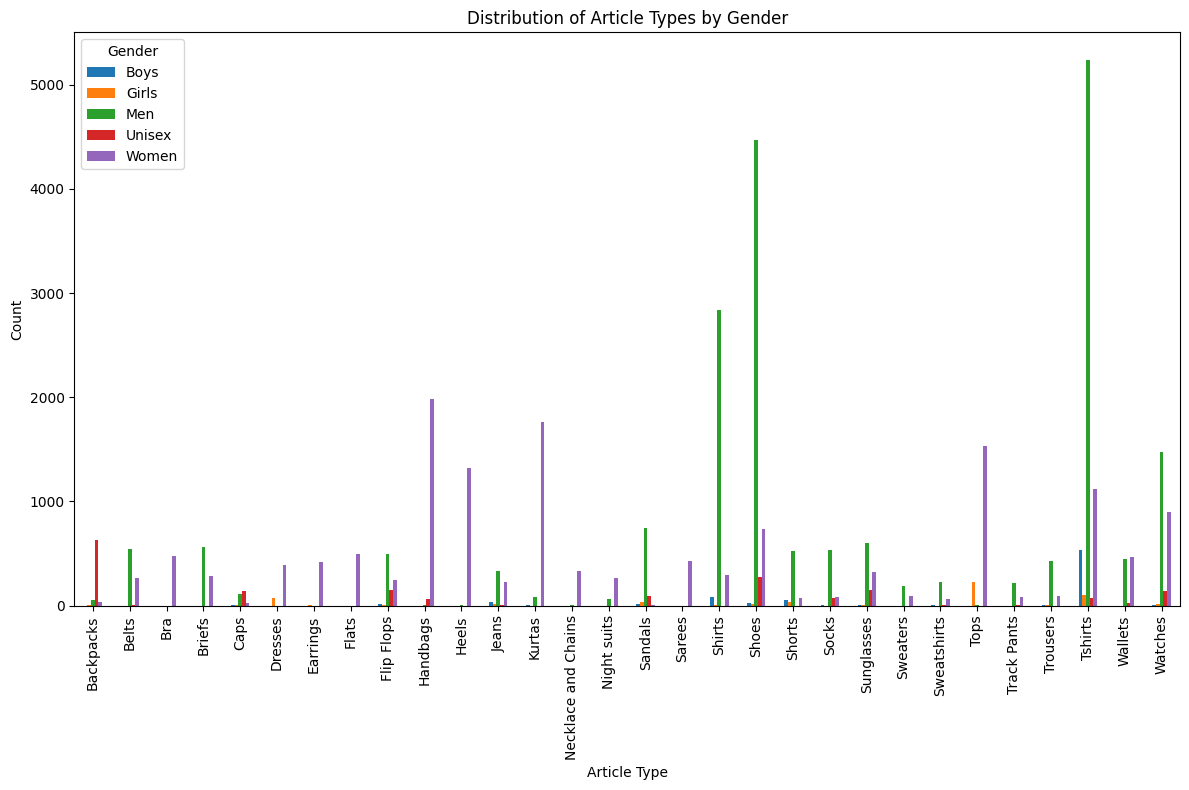

In [8]:
# Distribution of articleType classes by gender
distribution = styles.groupby(['gender', 'articleType']).size().reset_index(name='count')
import matplotlib.pyplot as plt

# Create a pivot table for visualization
pivot_table = distribution.pivot(index='articleType', columns='gender', values='count')

# Plot the distribution
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Article Types by Gender')
plt.ylabel('Count')
plt.xlabel('Article Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [9]:
styles.loc[((styles['gender'] == 'Women') | (styles['gender'] == 'Girls')) & (styles['articleType'] == 'Tshirts'), 'articleType'] = 'Tops'
styles["articleType"].value_counts()

articleType
Tshirts                5844
Shoes                  5518
Shirts                 3215
Tops                   2984
Watches                2542
Handbags               2049
Kurtas                 1844
Heels                  1323
Sunglasses             1073
Wallets                 936
Flip Flops              914
Sandals                 897
Briefs                  849
Belts                   813
Backpacks               724
Shorts                  687
Socks                   686
Jeans                   608
Trousers                530
Flats                   500
Bra                     477
Dresses                 464
Sarees                  427
Earrings                416
Necklace and Chains     336
Night suits             330
Track Pants             304
Sweatshirts             285
Caps                    283
Sweaters                277
Name: count, dtype: int64

Exploring other columns

- masterCategory

In [10]:
styles["masterCategory"].value_counts()

masterCategory
Apparel        19127
Accessories     9850
Footwear        9152
Free Items         6
Name: count, dtype: int64

In [11]:
drop_conditions = styles['masterCategory'].isin(["Free Items"])
deleted_rows = styles[drop_conditions]
styles = styles[~drop_conditions]
deleted_ids = deleted_rows['id'].tolist()
print(deleted_ids)
styles = styles.reset_index(drop=True)
styles.info()

[25088, 25140, 37701, 38437, 43285, 47341]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38129 entries, 0 to 38128
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              38129 non-null  int64 
 1   gender          38129 non-null  object
 2   masterCategory  38129 non-null  object
 3   subCategory     38129 non-null  object
 4   articleType     38129 non-null  object
 5   baseColour      38123 non-null  object
 6   usage           38113 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


- subcategory

In [12]:
styles["subCategory"].value_counts()

subCategory
Topwear                     14453
Shoes                        7343
Bags                         2770
Watches                      2542
Bottomwear                   1987
Innerwear                    1466
Eyewear                      1073
Wallets                       933
Flip Flops                    913
Sandal                        896
Belts                         811
Jewellery                     752
Socks                         686
Dress                         462
Saree                         427
Loungewear and Nightwear      332
Headwear                      283
Name: count, dtype: int64

- gender

In [13]:
styles["gender"].value_counts()

gender
Men       20200
Women     14792
Unisex     1821
Boys        773
Girls       543
Name: count, dtype: int64

In [14]:
articleTypes = styles["articleType"].value_counts().index
for t in articleTypes:
    print(t,"\n", styles[styles["articleType"] == t]["gender"].value_counts())

Tshirts 
 gender
Men       5242
Boys       531
Unisex      71
Name: count, dtype: int64
Shoes 
 gender
Men       4474
Women      733
Unisex     270
Boys        27
Girls       14
Name: count, dtype: int64
Shirts 
 gender
Men      2842
Women     294
Boys       78
Girls       1
Name: count, dtype: int64
Tops 
 gender
Women    2648
Girls     335
Men         1
Name: count, dtype: int64
Watches 
 gender
Men       1473
Women      902
Unisex     143
Girls       16
Boys         8
Name: count, dtype: int64
Handbags 
 gender
Women     1976
Unisex      65
Men          5
Name: count, dtype: int64
Kurtas 
 gender
Women    1761
Men        78
Boys        5
Name: count, dtype: int64
Heels 
 gender
Women    1322
Men         1
Name: count, dtype: int64
Sunglasses 
 gender
Men       598
Women     322
Unisex    150
Girls       2
Boys        1
Name: count, dtype: int64
Wallets 
 gender
Women     465
Men       449
Unisex     21
Name: count, dtype: int64
Flip Flops 
 gender
Men       496
Women     247
Unisex 

In [15]:
combination_counts = styles.groupby(['gender', 'articleType']).size().reset_index(name='count')
# Filter out combinations where the count is less than 6
valid_combinations = combination_counts[combination_counts['count'] >= 6]
# Merge valid combinations back into the original DataFrame to filter rows
styles = styles.merge(valid_combinations, on=['gender', 'articleType'])
articleTypes = styles["articleType"].value_counts().index
for t in articleTypes:
    print(t,"\n", styles[styles["articleType"] == t]["gender"].value_counts())
del styles["count"]

Tshirts 
 gender
Men       5242
Boys       531
Unisex      71
Name: count, dtype: int64
Shoes 
 gender
Men       4474
Women      733
Unisex     270
Boys        27
Girls       14
Name: count, dtype: int64
Shirts 
 gender
Men      2842
Women     294
Boys       78
Name: count, dtype: int64
Tops 
 gender
Women    2648
Girls     335
Name: count, dtype: int64
Watches 
 gender
Men       1473
Women      902
Unisex     143
Girls       16
Boys         8
Name: count, dtype: int64
Handbags 
 gender
Women     1976
Unisex      65
Name: count, dtype: int64
Kurtas 
 gender
Women    1761
Men        78
Name: count, dtype: int64
Heels 
 gender
Women    1322
Name: count, dtype: int64
Sunglasses 
 gender
Men       598
Women     322
Unisex    150
Name: count, dtype: int64
Wallets 
 gender
Women     465
Men       449
Unisex     21
Name: count, dtype: int64
Flip Flops 
 gender
Men       496
Women     247
Unisex    148
Boys       16
Girls       7
Name: count, dtype: int64
Sandals 
 gender
Men       749
Unisex 

- id

In [16]:
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,usage
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Sports
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Sports
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Sports
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Casual
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Sports


In [17]:
styles["id"].value_counts()[:10]

id
60000    1
1163     1
1164     1
1165     1
1525     1
1526     1
1529     1
1531     1
1532     1
1533     1
Name: count, dtype: int64

All rows have unique id's.

- usage

In [18]:
styles["usage"].value_counts()

usage
Casual          29701
Sports           3794
Ethnic           2483
Formal           1993
Smart Casual       64
Party              26
Travel             15
Name: count, dtype: int64

In [19]:
for val in styles["usage"].value_counts().index:
    print(styles[styles["usage"] == val])

          id  gender masterCategory subCategory articleType baseColour   usage
3       1525  Unisex    Accessories        Bags   Backpacks  Navy Blue  Casual
5       1529     Men        Apparel     Topwear     Tshirts        Red  Casual
6       1531     Men        Apparel     Topwear     Tshirts       Grey  Casual
7       1532     Men        Apparel     Topwear     Tshirts       Grey  Casual
8       1533     Men        Apparel     Topwear     Tshirts        Red  Casual
...      ...     ...            ...         ...         ...        ...     ...
38084  59992   Women        Apparel       Dress     Dresses      Black  Casual
38085  59993   Women        Apparel       Dress     Dresses      Black  Casual
38088  59996   Women        Apparel       Dress     Dresses     Purple  Casual
38089  59998   Women       Footwear       Shoes       Heels      Multi  Casual
38090  59999   Women       Footwear       Shoes       Heels     Bronze  Casual

[29701 rows x 7 columns]
          id  gender maste

We can combine smart casual and casual. also, travel can be combined into sports.

In [20]:
mappings = {
    "Smart Casual": "Casual",
    "Travel": "Sports"
}

styles['usage'] = styles['usage'].replace(mappings)

In [21]:
styles["usage"].value_counts()

usage
Casual    29765
Sports     3809
Ethnic     2483
Formal     1993
Party        26
Name: count, dtype: int64

- baseColour

In [22]:
styles["baseColour"].value_counts()

baseColour
Black                8676
White                5021
Blue                 4227
Brown                3063
Grey                 2462
Red                  2040
Green                1824
Navy Blue            1607
Pink                 1397
Purple               1358
Silver                898
Yellow                677
Beige                 652
Gold                  470
Maroon                431
Orange                414
Olive                 351
Multi                 331
Cream                 295
Charcoal              200
Steel                 198
Off White             148
Peach                 143
Khaki                 124
Grey Melange          121
Lavender              118
Tan                   110
Teal                  106
Magenta                99
Mustard                76
Bronze                 70
Copper                 63
Turquoise Blue         59
Rust                   45
Skin                   35
Metallic               35
Burgundy               28
Coffee Brown           27
S

In [23]:
# Define the mappings for colors
color_mappings = {
    "Lime Green": "Green",
    "Fluorescent Green": "Green",
    "Taupe": "Beige",
    "Mushroom Brown": "Beige",
    "Nude": "Beige",
    "Skin": "Beige",
    "Rose": "Burgundy",
    "Mauve": "Purple",
    "Sea Green": "Blue",
    "Coffee Brown": "Brown",
    "Rust": "Brown",
    "Metallic": "Grey",
    "Turquoise Blue": "Blue",
    "Grey Melange": "Grey",
    "Teal": "Blue",
    "Magenta": "Burgundy",
    "Tan": "Beige",
    "Off White": "White",
    "Charcoal": "Grey",
    "Olive": "Green",
    "Khaki": "Green",
    "Cream": "White",
    "Peach": "Orange",
    "Lavender": "Purple",
    "Copper": "Gold",
    "Bronze": "Brown"
}

styles['baseColour'] = styles['baseColour'].replace(color_mappings)

print(styles['baseColour'].value_counts())


baseColour
Black        8676
White        5464
Blue         4410
Brown        3205
Grey         2818
Green        2308
Red          2040
Navy Blue    1607
Purple       1485
Pink         1397
Silver        898
Beige         838
Yellow        677
Orange        557
Gold          533
Maroon        431
Multi         331
Steel         198
Burgundy      137
Mustard        76
Name: count, dtype: int64


In [24]:
styles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38092 entries, 0 to 38091
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              38092 non-null  int64 
 1   gender          38092 non-null  object
 2   masterCategory  38092 non-null  object
 3   subCategory     38092 non-null  object
 4   articleType     38092 non-null  object
 5   baseColour      38086 non-null  object
 6   usage           38076 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


# Handling missing data

In [25]:
styles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38092 entries, 0 to 38091
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              38092 non-null  int64 
 1   gender          38092 non-null  object
 2   masterCategory  38092 non-null  object
 3   subCategory     38092 non-null  object
 4   articleType     38092 non-null  object
 5   baseColour      38086 non-null  object
 6   usage           38076 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [26]:
styles[styles["baseColour"].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,usage
7838,11288,Men,Apparel,Bottomwear,Jeans,NaN,Casual
7843,11293,Men,Apparel,Bottomwear,Jeans,NaN,Casual
7857,11309,Men,Apparel,Bottomwear,Jeans,NaN,Casual
28121,41347,Men,Apparel,Bottomwear,Jeans,NaN,Casual
28128,41355,Men,Apparel,Bottomwear,Jeans,NaN,Casual
28130,41357,Men,Apparel,Bottomwear,Jeans,NaN,Casual


In [27]:
styles[styles["articleType"] == "Jeans"]["baseColour"].value_counts()

baseColour
Blue         441
Black         78
Navy Blue     48
Grey          21
White          4
Purple         2
Brown          1
Pink           1
Orange         1
Name: count, dtype: int64

In [28]:
styles.loc[(styles['id'] == 11288),'baseColour'] = 'Navy Blue'
styles.loc[(styles['id'] == 11293),'baseColour'] = 'Blue'
styles.loc[(styles['id'] == 11309),'baseColour'] = 'Navy Blue'
styles.loc[(styles['id'] == 41347),'baseColour'] = 'Black'
styles.loc[(styles['id'] == 41355),'baseColour'] = 'Navy Blue'
styles.loc[(styles['id'] == 41357),'baseColour'] = 'Blue'

In [29]:
styles[styles["usage"].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,usage
6056,9024,Men,Footwear,Sandal,Sandals,Beige,NaN
13627,18826,Men,Accessories,Wallets,Wallets,Brown,NaN
18754,26365,Women,Apparel,Topwear,Shirts,White,NaN
18756,26367,Women,Apparel,Topwear,Shirts,Purple,NaN
18759,26370,Women,Apparel,Topwear,Shirts,Black,NaN
20107,28319,Men,Footwear,Sandal,Sandals,Brown,NaN
22799,32603,Men,Accessories,Wallets,Wallets,Brown,NaN
22800,32604,Men,Accessories,Wallets,Wallets,Brown,NaN
22801,32605,Men,Accessories,Wallets,Wallets,Brown,NaN
22802,32606,Men,Accessories,Wallets,Wallets,Brown,NaN


In [30]:
styles[styles["articleType"] == "Wallets"]["usage"].value_counts()

usage
Casual    897
Formal     30
Name: count, dtype: int64

In [31]:
styles[(styles["articleType"] == "Shirts") & (styles["gender"] == "Women")]["usage"].value_counts()


usage
Casual    261
Formal     30
Name: count, dtype: int64

In [32]:
styles[styles["articleType"] == "Briefs"]["usage"].value_counts()

usage
Casual    847
Name: count, dtype: int64

In [33]:
styles[styles["articleType"] == "Night suits"]["usage"].value_counts()

usage
Casual    329
Name: count, dtype: int64

In [34]:
styles.loc[(styles['id'] == 9024),'usage'] = 'Casual'
styles.loc[(styles['id'] == 18826),'usage'] = 'Casual'
styles.loc[(styles['id'] == 26365),'usage'] = 'Formal'
styles.loc[(styles['id'] == 26367),'usage'] = 'Formal'
styles.loc[(styles['id'] == 26370),'usage'] = 'Casual'
styles.loc[(styles['id'] == 28319),'usage'] = 'Sports'
styles.loc[(styles['id'] == 32603),'usage'] = 'Formal'
styles.loc[(styles['id'] == 32604),'usage'] = 'Formal'
styles.loc[(styles['id'] == 32605),'usage'] = 'Casual'
styles.loc[(styles['id'] == 32606),'usage'] = 'Casual'
styles.loc[(styles['id'] == 32607),'usage'] = 'Formal'
styles.loc[(styles['id'] == 32608),'usage'] = 'Formal'
styles.loc[(styles['id'] == 32609),'usage'] = 'Formal'
styles.loc[(styles['id'] == 32717),'usage'] = 'Casual'
styles.loc[(styles['id'] == 32719),'usage'] = 'Casual'
styles.loc[(styles['id'] == 51061),'usage'] = 'Casual'
styles.loc[(styles['id'] == 51061),'subCategory'] = 'Dress'
styles.loc[(styles['id'] == 51061),'articleType'] = 'Dresses'
styles.loc[(styles['id'] == 51061),'baseColour'] = 'Green'



In [35]:
styles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38092 entries, 0 to 38091
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              38092 non-null  int64 
 1   gender          38092 non-null  object
 2   masterCategory  38092 non-null  object
 3   subCategory     38092 non-null  object
 4   articleType     38092 non-null  object
 5   baseColour      38092 non-null  object
 6   usage           38092 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [36]:
styles.to_csv("preprocessed_styles.csv")